## Práctica 4: Error de estado estacionario

<blockquote>
La idea de esta práctica es entrenar y reafirmar los conceptos fundamentales del tema: 
<ul>
<li>Definición de <b>sistema tipo</b>, como el orden del polinomio que es capaz de seguir (respecto a referencias) o rechazar (respecto a perturbaciones) con error constante y 
</li>
<li>la idea de que el error de estado estacionario es proporcional a la inversa de <b>la ganancia de lazo del sistema</b> $e_ss \propto \frac{1}{k}$ donde $k$ es la ganancia del lazo ($L(s)=D(s)*G(s)*H(s)$)</li>
</ul>
</blockquote>

<img src="pr4fig1.png" width="600">

En la figura se muestra el servosistema de control de posición de una antena de microondas. La función de transferencia de la antena, motor de posicionamiento y amplificador rotativo se puede aproximar por:

$$ G(s) =\dfrac{100}{s^2 + 8s + 100}$$

Considere que la función de transferencia del amplificador magnético es aproximadamente:

$$G_1(s) =\dfrac{K_a}{\tau s + 1}$$

con $\tau$ = 0,2 segundos.

(a) Obtener las siguientes funciones $\dfrac{\theta (s)}{R(s)}$,$\dfrac{\theta (s)}{D(s)}$,$\dfrac{E(s)}{D(s)}$y$\dfrac{E(s)}{R(s)}$, recodar que se definió del error es $e(t) = r(t) − y (t)$.  Verificar con Python haciendo $K_a = 1$. Tener en cuenta que para esto es necesario usar la función `ctrl.feedback`.


$$
\begin{align*}
H_1(s)=\frac{\theta(s)}{R(s)}=\frac{G_1(s)G(s)}{1+G_1(s)G(s)}\\
H_2(s)=\frac{\theta(s)}{D(s)}=\frac{G(s)}{1+G_1(s)G(s)}\\
H_3(s)=\frac{E(s)}{D(s)}=\frac{-G(s)}{1+G_1(s)G(s)}\\
H_4(s)=\frac{E(s)}{R(s)}=\frac{1}{1+G_1(s)G(s)}\\
\end{align*}
$$

(b) El sistema se somete a un torque de perturbación debido al viento que se representa con un escalón de la forma, $d = \dfrac{5}{s}$. Determine la magnitud de $K_a$ necesaria para mantener el error de estado estacionario del sistema menor que 2°, cuando la entrada $R(s)$ es nula. Verifíque el resultado en simulación.

(c) Idem anterior, pero para una perturbacion de $d=\dfrac{10}{s}$. **Verfique mediante simulación dinámica** y **justifique lo obtenido**. ¿Funciona la formula del error a perturbaciones para este caso? ¿Por que? ¿Que hipótesis no se cumple?


In [83]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

GG1=ctrl.tf([100],[1,8,100])*ctrl.tf([1],[.2,1])
G1=ctrl.tf([1],[.2,1])
G=ctrl.tf([100],[1,8,100])
k1=1
tao=.2#para comentarios
H1=ctrl.feedback(G1*G)
H2=ctrl.feedback(G,G1)
H3=ctrl.feedback(sys1=-G,sys2=G1)
H4=ctrl.feedback(sys1=1,sys2=G1*G)
(t1,y1)=ctrl.step_response(H1)
(t2,y2)=ctrl.step_response(H2)
(t3,e3)=ctrl.step_response(H3)
(t4,e4)=ctrl.step_response(H4)
H3


TransferFunction(array([ -20., -100.]), array([ 0.2,  2.6, 28. ,  0. ]))

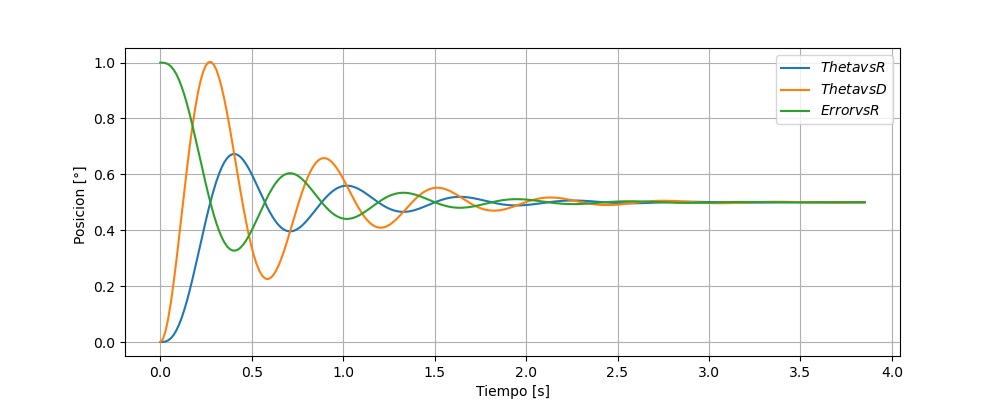

In [84]:
#Trtheta=ctrl.feedback(GG1)
#Trtheta

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(t1[:],y1[:], label=r'$Theta vs R$')
ax.set_xlabel('Tiempo [s]')
ax.plot(t2[:],y2[:], label=r'$Theta vs D$')
ax.plot(t4[:],e4[:], label=r'$Error vs R$')
ax.set_ylabel('Posicion [°] ')
ax.legend();
ax.grid();


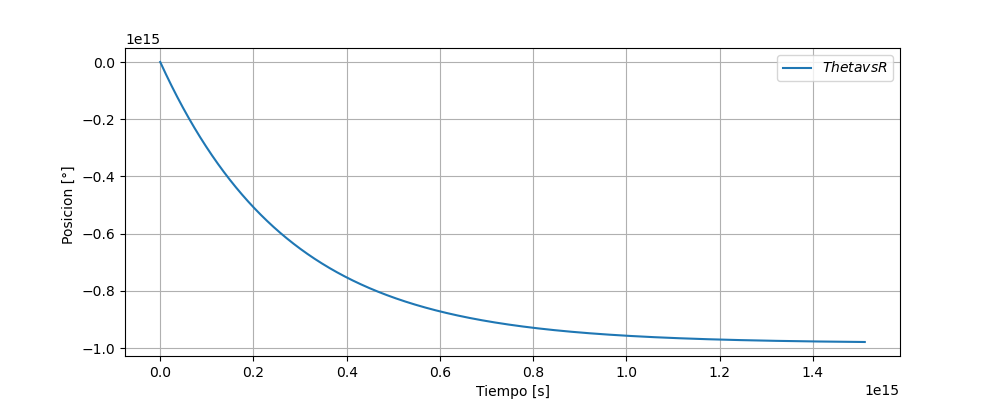

In [85]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(t3[:],e3[:], label=r'$Theta vs R$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Posicion [°] ')
ax.legend();
ax.grid();


(b) Defino $K_a$ de manera tal que el error de estado estacionario de E sea...

$$
\begin{align*}
\lim_{t \rightarrow \infty}e(t)&= \lim_{s \rightarrow 0}sE(s)=2\\
\lim_{s \rightarrow 0}\frac{s(-G(s))}{1+G_1(s)G(s)}\frac{5}{s}&=2\\
\lim_{s \rightarrow 0}\frac{(-5G(s))}{1+G_1(s)G(s)}&=2\\
\frac{(-5)}{1+K_a}&=2\\
K_a&=-3.5
\end{align*}
$$
Luego,


array([-13.9373827+18.98367613j, -13.9373827-18.98367613j,
        14.8747654 +0.j        ])

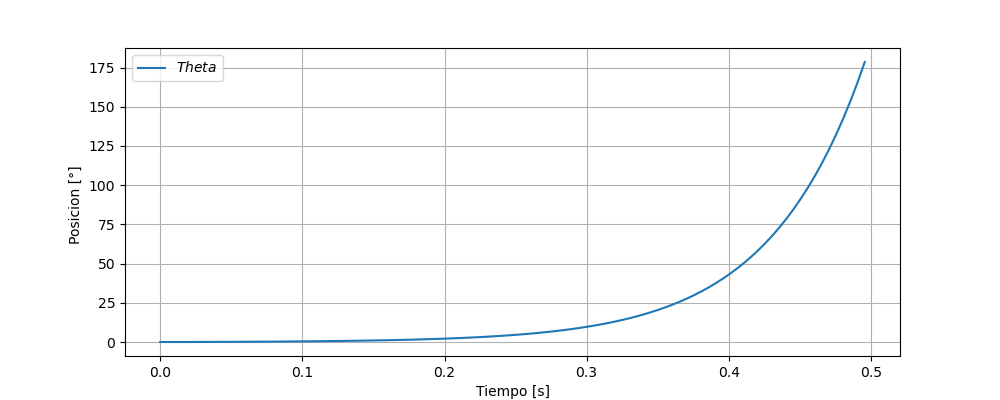

In [86]:
G1b=ctrl.tf([-3.5],[.2,1])
H5=ctrl.feedback(G,5*G1b)
(t5,e5)=ctrl.step_response(H5)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(t5[:],e5[:], label=r'$Theta$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Posicion [°] ')
ax.legend();
ax.grid();
H5.pole()

Se observa que la respuesta temporal diverge, esto ocurre porque el TVF asume que el sistema tiene todos sus polos del lado izquierdo del plano complejo, lo cual no se esta cumpliendo para H5, que se vuelve inestable, dado que el controlador no alcanza a afectar a la perturbación que inestabiliza al sistema, y no se obtiene un valor deseado con el cual comparar la variable para obtener el error deseado.

c) En este caso se procede de la misma manera, con otra respuesta entrada escalón:

$$
\begin{align*}
\lim_{t \rightarrow \infty}e(t)&= \lim_{s \rightarrow 0}sE(s)=2\\
\lim_{s \rightarrow 0}\frac{s(-G(s))}{1+G_1(s)G(s)}\frac{10}{s}&=2\\
\lim_{s \rightarrow 0}\frac{(-10G(s))}{1+G_1(s)G(s)}&=2\\
\frac{(-10)}{1+K_a}&=2\\
K_a&=-6
\end{align*}
$$

array([-13.9373827+18.98367613j, -13.9373827-18.98367613j,
        14.8747654 +0.j        ])

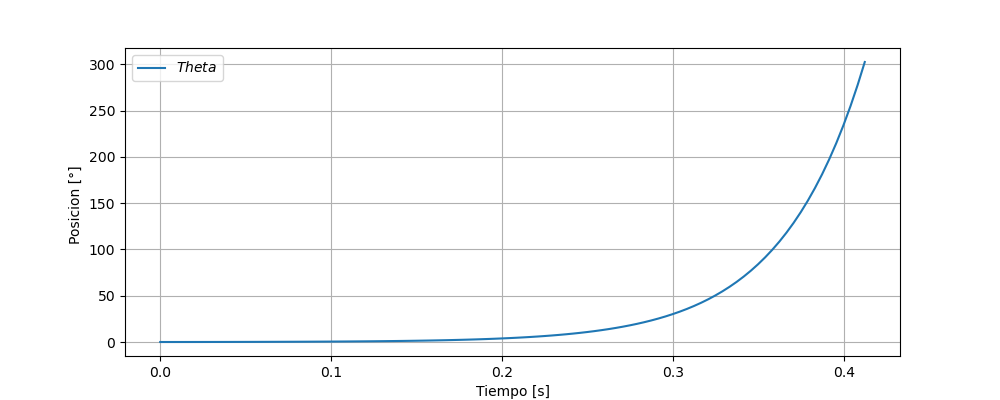

In [87]:
#Tdtheta=ctrl.feedback(G,G1)
#Tdtheta
#...........................
G1c=ctrl.tf([-6],[.2,1])
H6=ctrl.feedback(G,10*G1b)
(t6,e6)=ctrl.step_response(H6)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(t6[:],e6[:], label=r'$Theta$')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Posicion [°] ')
ax.legend();
ax.grid();
H5.pole()

In [88]:
#Tdtheta.zero()

¿Funciona la formula del error a perturbaciones para este caso? ¿Por que? ¿Que hipótesis no se cumple?

En ningún caso funciona la formula del error a perturbaciones, esto ocurre porque la perturbación ingresa directamente al sistema, y el controlador no puede contrarrestarla antes de inestabilizarlo y el valor deseado diverge. 
No se cumple la hipótesis del TVF de que todos los polos se encuentren en el semiplano izquierdo complejo.